## Exploratory Data Analysis On Electric Vehicle Population

![](https://i.imgur.com/UD4zG1r.jpg) ![](https://i.imgur.com/gNJEyFR.jpg)

## GitHub LInk:- [https://github.com/ram8919/Electric_Vehicle_Population_Analysis-.git](https://https://github.com/ram8919/Electric_Vehicle_Population_Analysis-.git)

## What is Exploratory Data Analysis?
- Exploratory Data Analysis (EDA) is the process of analyzing a dataset in order to understand its main characteristics, patterns and identify anomalies. EDA is often the first step in the data analysis process.

- It involves using different graphs and plots to help visualise the data and also uses statistical methods to draw inferences from the data.

- The goal of EDA is not to arrive at a certain right answer or to confirm a pre-defined hypothesis. It is an exploratory process to draw inferences and get ideas on how the data can be further utilised to predict certain outcomes/develop ML models

## Introduction to the Electric Vehicles

- An electric vehicle (EV) is a vehicle that uses one or more electric motors for propulsion. It can be powered by a collector system, with electricity from extravehicular sources, or it can be powered autonomously by a battery (sometimes charged by solar panels, or by converting fuel to electricity using fuel cells or a generator).

- EVs include, but are not limited to, road and rail vehicles, surface and underwater vessels, electric aircraft , and electric spacecraft.
- For road vehicles, together with other emerging automotive technologies such as autonomous driving, connected vehicles, and shared mobility, EVs form a future mobility vision called Connected, Autonomous, Shared, and Electric (CASE) Mobility.
- EVs first came into existence in the late 19th century, when electricity was among the preferred methods for motor vehicle propulsion, providing a level of comfort and ease of operation that could not be achieved by the gasoline cars of the time.
- Internal combustion engines were the dominant propulsion method for cars and trucks for about 100 years, but electric power remained commonplace in other vehicle types, such as trains and smaller vehicles of all types.

## About Dataset
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through the Washington State Department of Licensing (DOL).

1.A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle into an electric power source.

2 Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.

3.Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.

4.Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.

5.Field 'Electric Utility' was added starting with the publication in March 2022.

6.Field '2020 Census Tract' was added starting with the publication in June 2022.

### PROJECT OUTINE

The steps involved in the process of Exploratory Data Analysis are.,

- Import the required libraries and its dependencies.

- Download the dataset.

- Data preparation and cleaning it.

- Exploratory Analysis.

- Ask and solve questions from the data.

- Pictorial representation of data using visualization techniques.

## Installing Packages and Importing Libraries

In [110]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [111]:
# Load Dataset
df = pd.read_csv(r'/content/Electric_Vehicle_Population_Data.csv')

In [112]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [113]:
# Dataset Rows & Columns count
df.shape

(21791, 17)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21791 entries, 0 to 21790
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         21791 non-null  object 
 1   County                                             21791 non-null  object 
 2   City                                               21791 non-null  object 
 3   State                                              21791 non-null  object 
 4   Postal Code                                        21791 non-null  int64  
 5   Model Year                                         21791 non-null  int64  
 6   Make                                               21791 non-null  object 
 7   Model                                              21791 non-null  object 
 8   Electric Vehicle Type                              21791 non-null  object 
 9   Clean 

In [115]:
# Find duplicated rows
duplicate_rows = df[df.duplicated()]

# Print the duplicated rows
print("Duplicate Rows :")
print(duplicate_rows)

# Count the number of duplicated rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Duplicate Rows :
Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []

Number of duplicate rows: 0


In [116]:
# Dataset Duplicate or Non Duplicate Value Count
df.duplicated().value_counts()

,count
False,21791


In [117]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [118]:
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 1
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64


In [119]:
df1 = df.copy()

In [120]:
df1.dropna(inplace=True)

In [121]:
print(df1.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


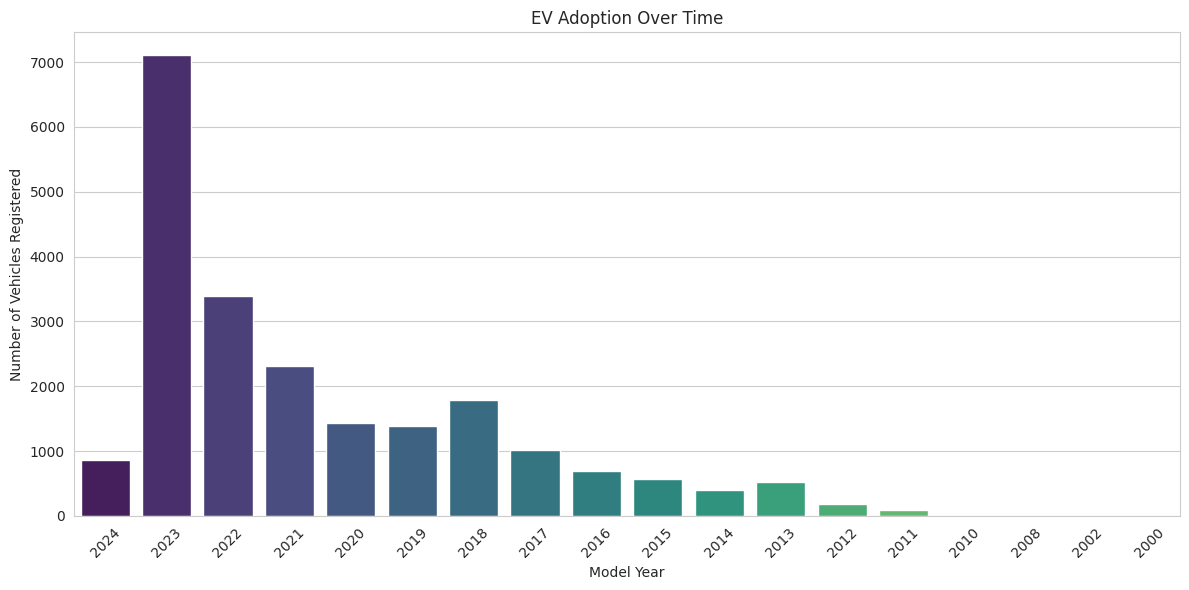

In [122]:
# Electric Vehicles Market Size Analysis
sns.set_style("whitegrid")
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = df1['Model Year'].value_counts().sort_index()
# sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis", order=ev_adoption_by_year.index[::-1])
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
# geographical distribution at county level
ev_county_distribution = df1['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = df1[df1['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County',
'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

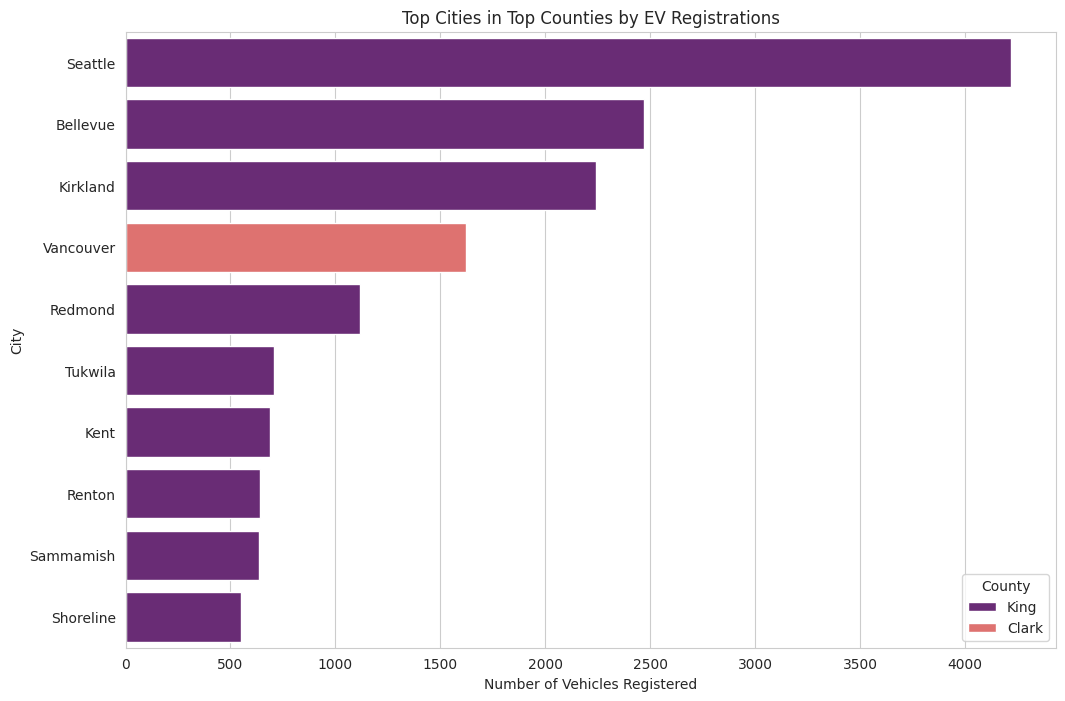

In [124]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities,
palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout
plt.show()

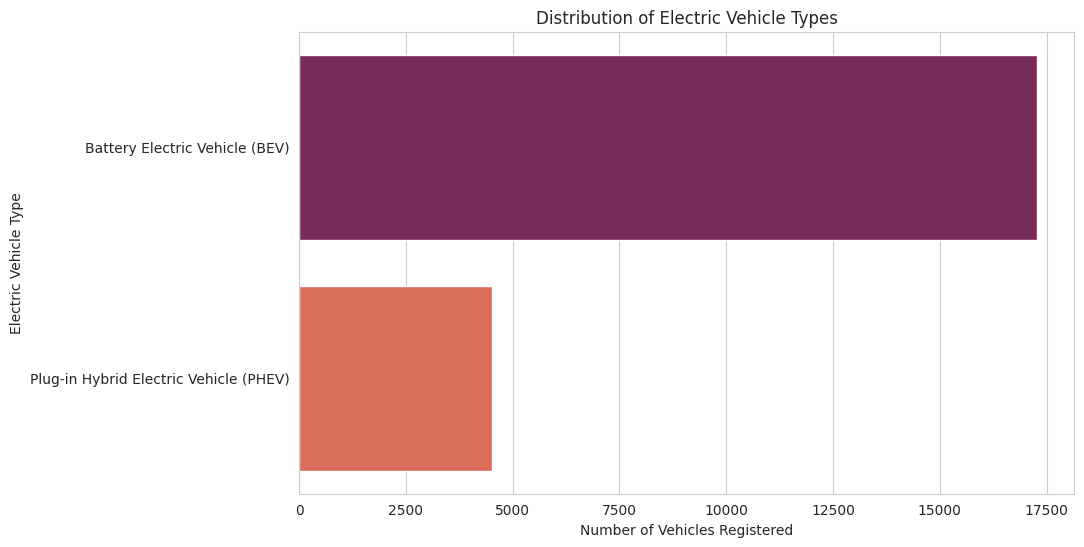

In [125]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = df1['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,
palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel("Number of Vehicles Registered")
plt.ylabel('Electric Vehicle Type')
plt.tight_layout
plt.show()

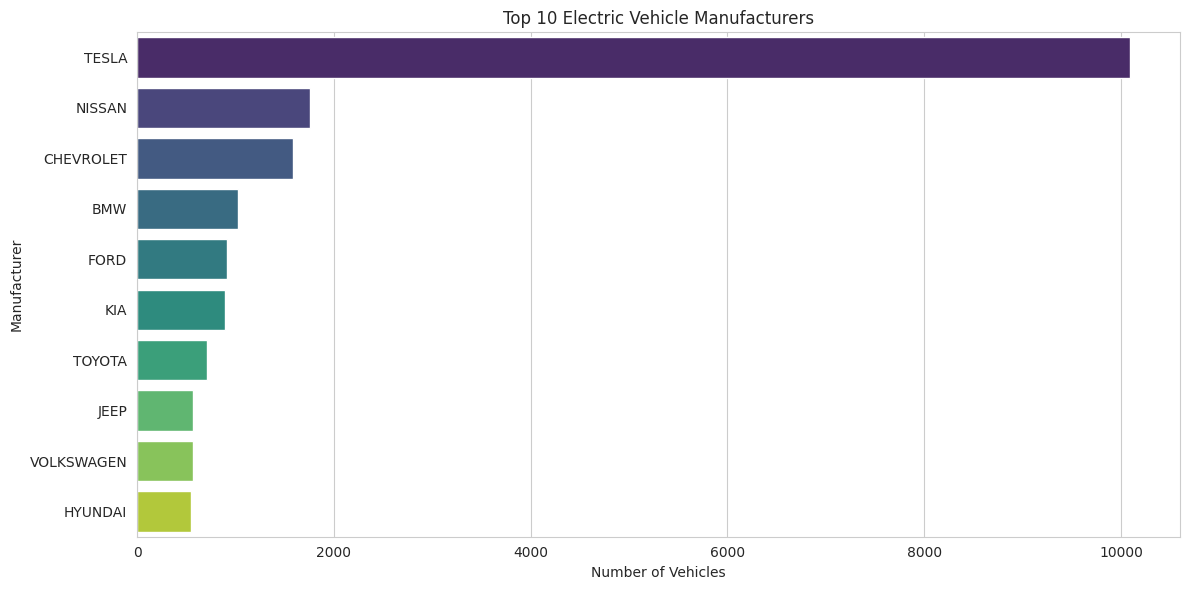

In [126]:
# Manufacturer Popularity
manufacturer_popularity = df1['Make'].value_counts()
top_manufacturers = manufacturer_popularity.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='viridis')
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()


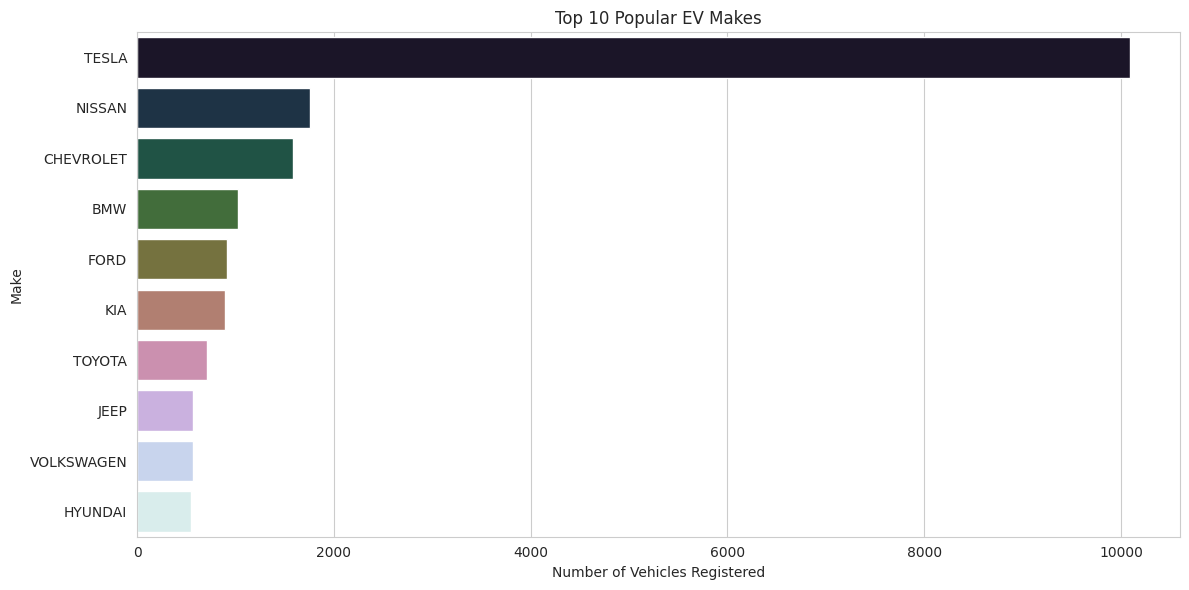

In [127]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = df1['Make'].value_counts().head(10) # Limiting to top 10
# for clarity
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index,
palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [128]:
# Get the top 10 manufacturers
top_manufacturers = df1['Make'].value_counts().head(10).index

# Create an empty dictionary to store the top models for each manufacturer
top_models_by_manufacturer = {}

# Iterate through the top manufacturers
for manufacturer in top_manufacturers:
  # Filter the DataFrame for the current manufacturer
  manufacturer_df = df1[df1['Make'] == manufacturer]

  # Get the top 5 models for the current manufacturer
  top_models = manufacturer_df['Model'].value_counts().head(5)

  # Store the top models in the dictionary
  top_models_by_manufacturer[manufacturer] = top_models

# Print the top models for each manufacturer
for manufacturer, models in top_models_by_manufacturer.items():
  print(f"Top models for {manufacturer}:")
  print(models)
  print("\n")

Top models for TESLA:
Model
MODEL Y     4491
MODEL 3     3839
MODEL S      953
MODEL X      804
ROADSTER       7
Name: count, dtype: int64


Top models for NISSAN:
Model
LEAF     1702
ARIYA      60
Name: count, dtype: int64


Top models for CHEVROLET:
Model
BOLT EV         799
VOLT            491
BOLT EUV        253
SPARK            33
SILVERADO EV      3
Name: count, dtype: int64


Top models for BMW:
Model
X5      364
I3      229
I4      156
IX      107
530E     57
Name: count, dtype: int64


Top models for FORD:
Model
MUSTANG MACH-E    352
C-MAX             158
FUSION            152
F-150             131
ESCAPE             54
Name: count, dtype: int64


Top models for KIA:
Model
NIRO        410
EV6         225
SPORTAGE     79
SORENTO      63
SOUL         57
Name: count, dtype: int64


Top models for TOYOTA:
Model
PRIUS PRIME      284
RAV4 PRIME       264
PRIUS PLUG-IN    111
BZ4X              33
PRIUS             14
Name: count, dtype: int64


Top models for JEEP:
Model
WRANGLER    

In [129]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index
# filtering the dataset for these top manufacturers
top_makes_data = df1[df1['Make'].isin(top_3_makes)]
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

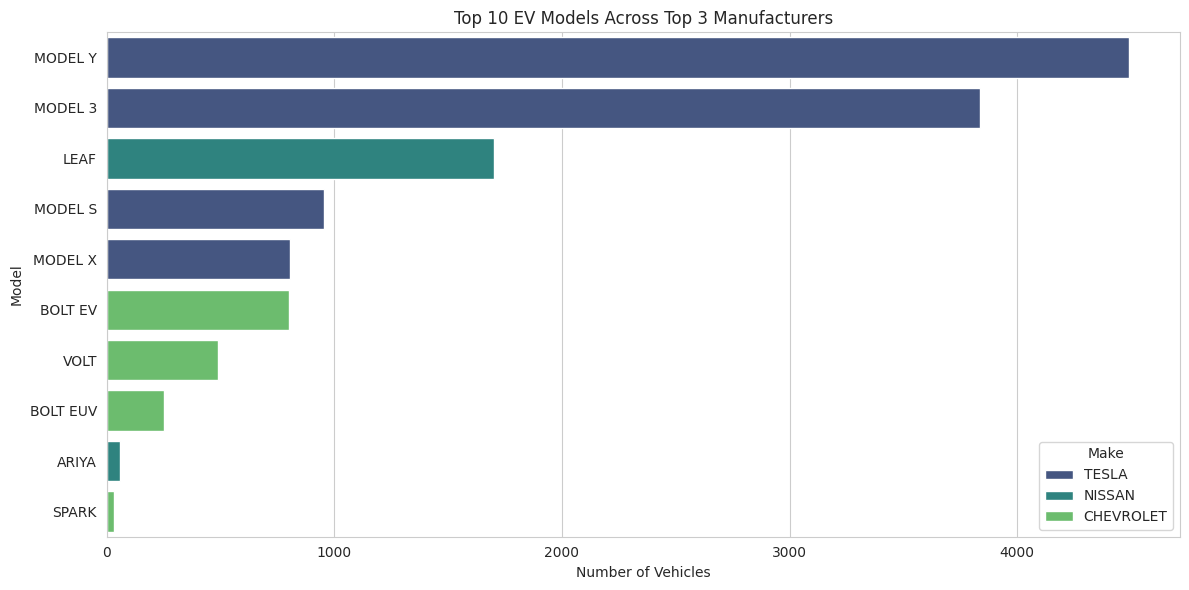

In [130]:
# Top 10 EV Models Across Top 3 Manufacturers

plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette='viridis')
plt.title('Top 10 EV Models Across Top 3 Manufacturers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

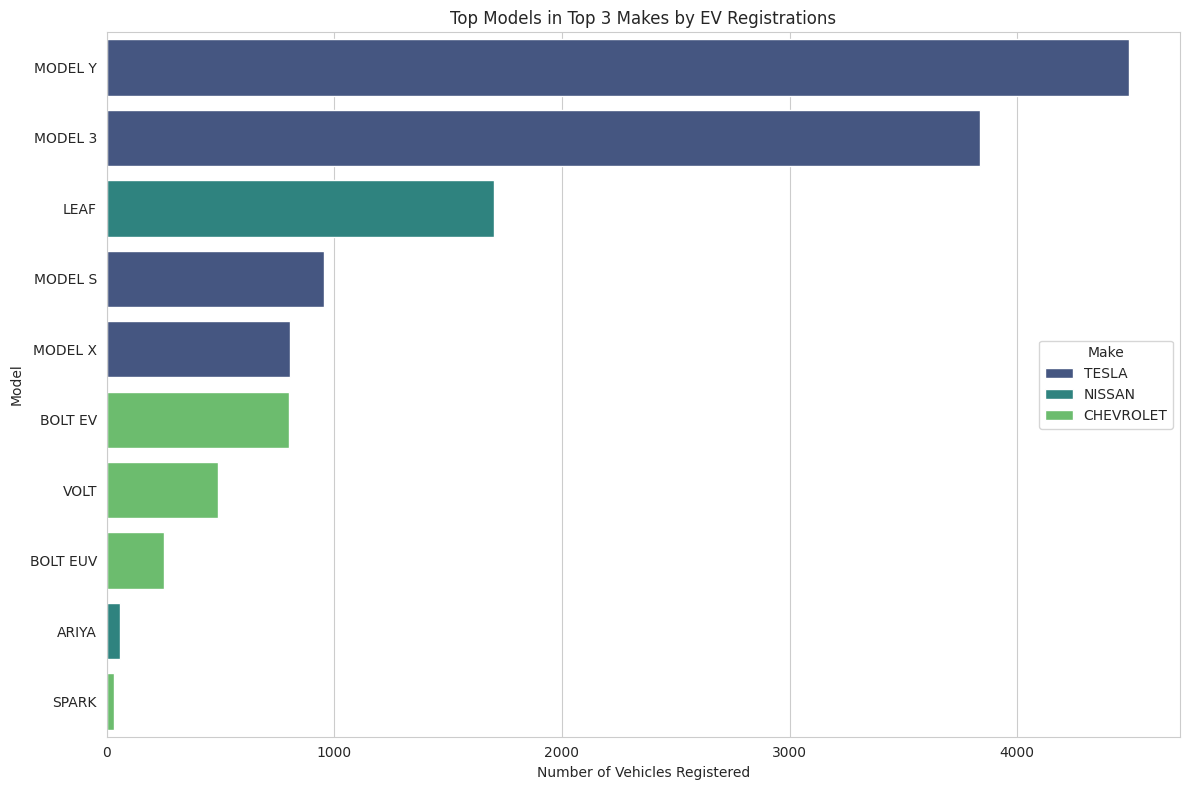

In [131]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models,
palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

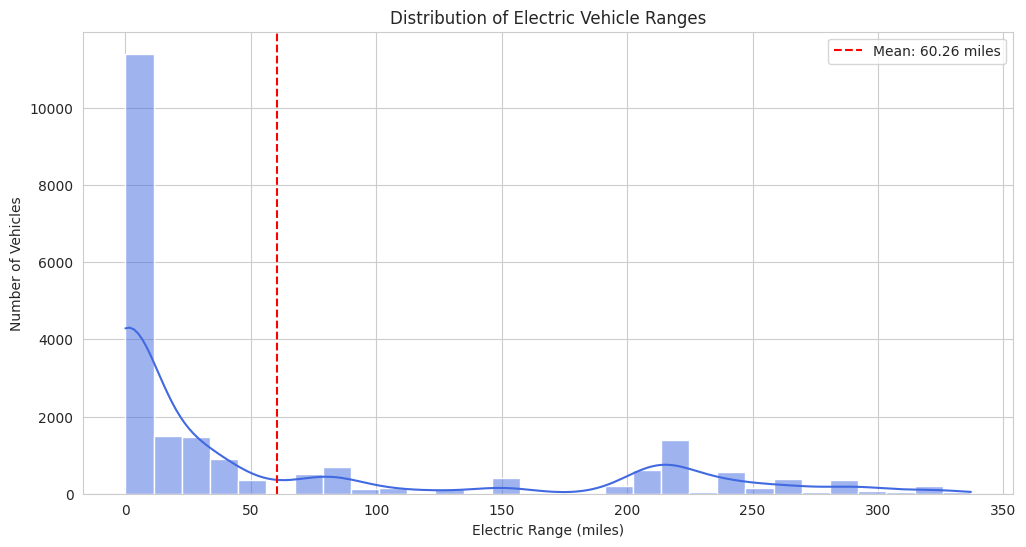

In [132]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(df1['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df1['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean: {df1["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows the mean electric range. Key observations from the graph include:
• There is a high frequency of vehicles with a low electric range, with a significant peak
occurring just before 50 miles.
• The distribution is skewed to the right, with a long tail extending towards higher ranges,
although the number of vehicles with higher ranges is much less frequent.
The mean electric range for this vehicle set is approximately 58.84 miles, which is
relatively low compared to the highest ranges shown in the graph.
Despite the presence of electric vehicles with ranges extending up to around 350 miles,
most vehicles have a range below the mean.
• It suggests that while Evs are available with high electric ranges, the average range is
skewed lower due to a substantial number of vehicles with shorter ranges.

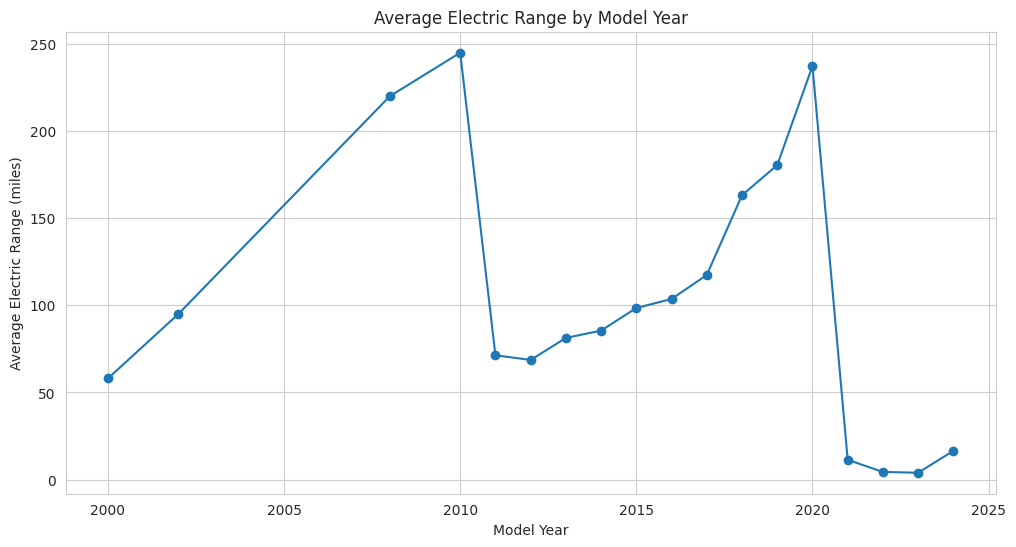

In [133]:
# Calculate the average electric range by model year
average_range_by_year = df1.groupby('Model Year')['Electric Range'].mean()

# Plot the average electric range by model year
plt.figure(figsize=(12, 6))
plt.plot(average_range_by_year.index, average_range_by_year.values, marker='o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()


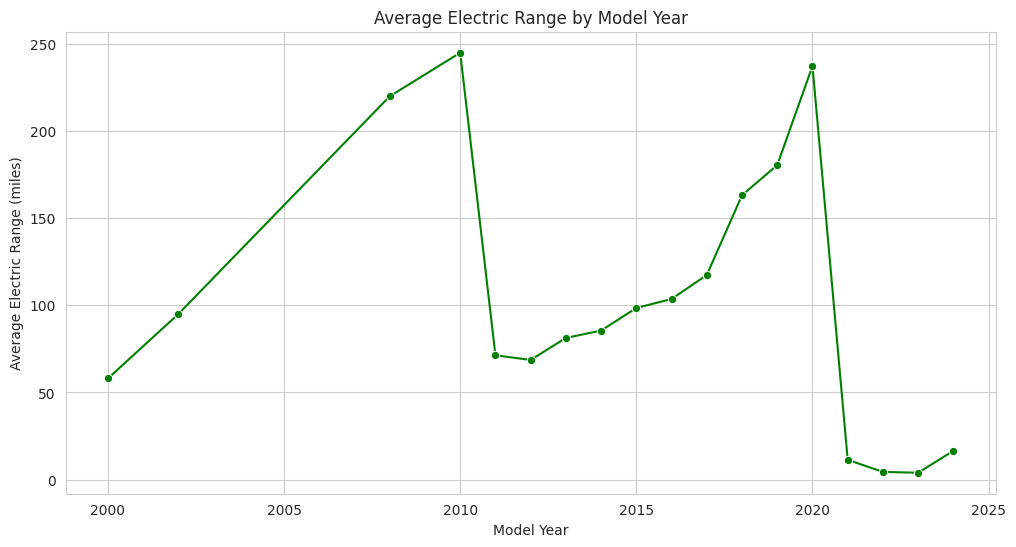

In [134]:
# calculating the average electric range by model year
average_range_by_year = df1.groupby('Model Year') ['Electric Range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year,
marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

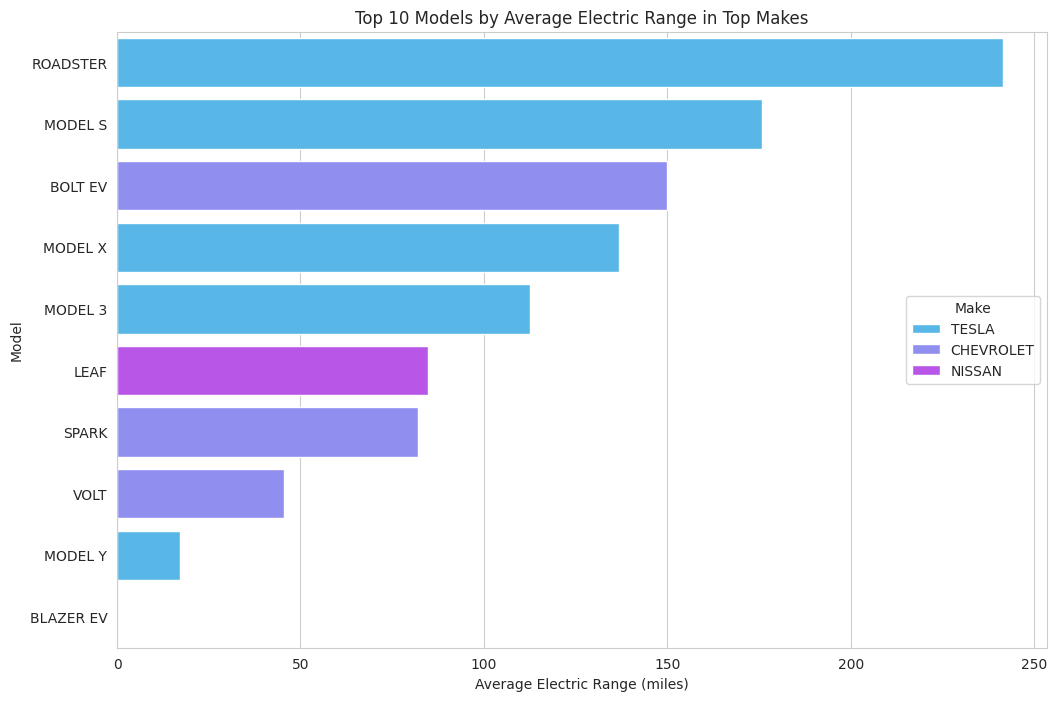

In [135]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed.
TESLA's models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the
majority of the top positions, indicating that on average, TESLA's vehicles have higher
electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models,
having a substantially higher range than the VOLT and S-10 PICKUP from the same maker.
NISSAN's LEAF and CHEVROLET's SPARK are in the lower half of the chart, suggesting
more modest average ranges.

    Model Year  Number of EVs Registered
0         2000                         1
1         2002                         1
2         2008                         1
3         2010                         5
4         2011                        85
5         2012                       181
6         2013                       530
7         2014                       403
8         2015                       574
9         2016                       696
10        2017                      1019
11        2018                      1795
12        2019                      1394
13        2020                      1432
14        2021                      2309
15        2022                      3397
16        2023                      7105
17        2024                       862


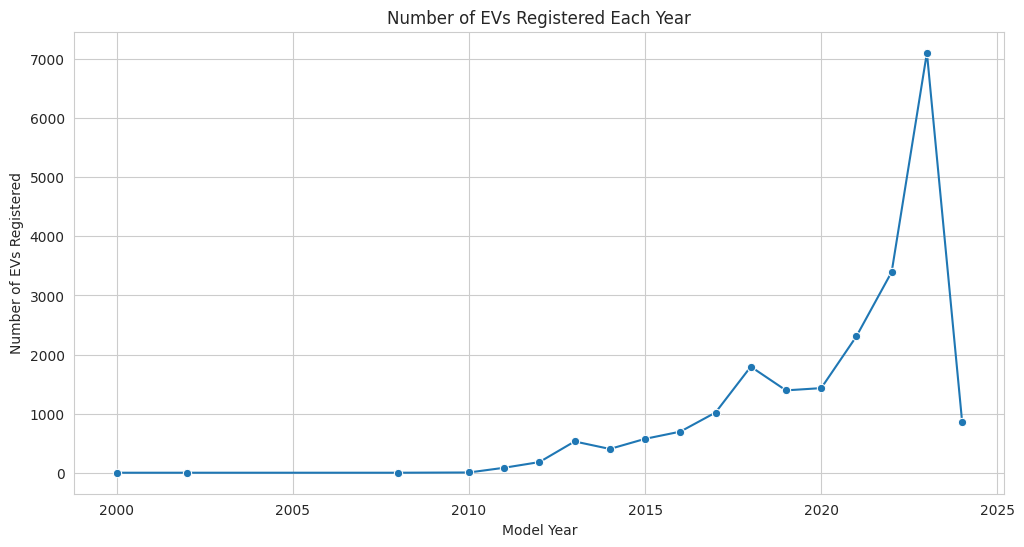

In [136]:
# United States. I'll first count the number of EVs registered every year:

# Calculate the number of EVs registered each year
ev_registration_by_year = df1.groupby('Model Year')['VIN (1-10)'].count().reset_index()
ev_registration_by_year = ev_registration_by_year.rename(columns={'VIN (1-10)': 'Number of EVs Registered'})

# Display the result
print(ev_registration_by_year)

# You can also plot this data to visualize the trend of EV registrations over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Number of EVs Registered', data=ev_registration_by_year, marker='o')
plt.title('Number of EVs Registered Each Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs Registered')
plt.grid(True)
plt.show()


In [137]:
# calculate the number of EVs registered each year
ev_registration_counts = df1['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
2000,1
2002,1
2008,1
2010,5
2011,85
2012,181
2013,530
2014,403
2015,574


Compound Annual Growth Rate (CAGR) from 2018 to 2023: 0.3167
Projected EV registrations for 2024: 9355

Projected EV Market Size for the Next Five Years:
   Year  Projected Registrations
0  2024              9355.435483
1  2025             12318.673199
2  2026             16220.485904
3  2027             21358.157548
4  2028             28123.133705


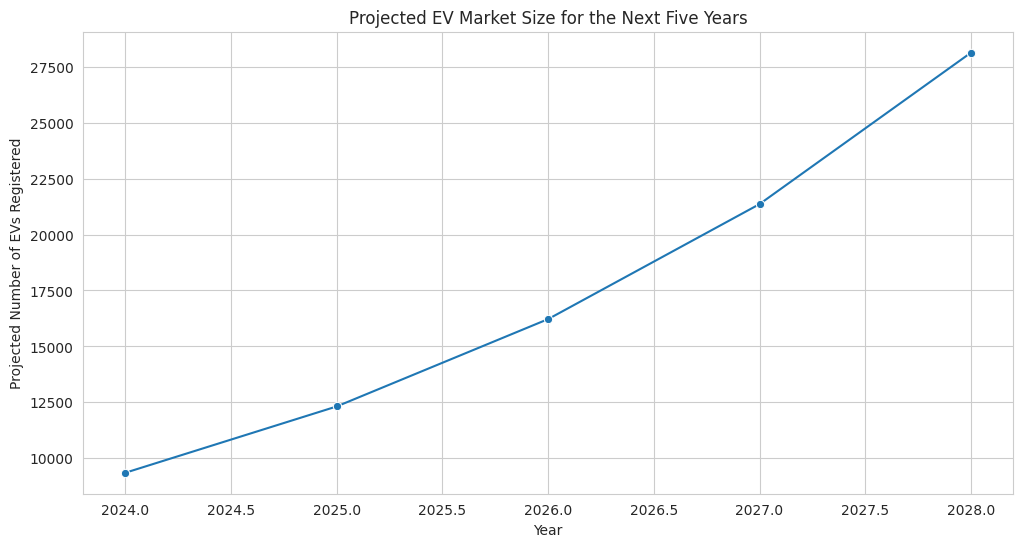

In [138]:
# Select the starting and ending years for CAGR calculation
start_year = 2018
end_year = 2023

# Get the number of EVs registered in the starting and ending years
start_year_registrations = ev_registration_counts.get(start_year, 0)
end_year_registrations = ev_registration_counts.get(end_year, 0)

# Calculate CAGR
if start_year_registrations > 0:
  cagr = ( (end_year_registrations / start_year_registrations) ** (1 / (end_year - start_year)) ) - 1
else:
  cagr = 0  # Handle the case where there are no registrations in the starting year

print(f"Compound Annual Growth Rate (CAGR) from {start_year} to {end_year}: {cagr:.4f}")


# Project the number of EV registrations for 2024 using the CAGR
projected_2024_registrations = end_year_registrations * (1 + cagr)
print(f"Projected EV registrations for 2024: {projected_2024_registrations:.0f}")

# Project the market size for the next five years
projected_registrations = []
for year in range(2024, 2029):
  projected_registrations.append(
      (end_year_registrations * (1 + cagr) ** (year - end_year))
  )

# Create a DataFrame for projected registrations
projected_df = pd.DataFrame({'Year': range(2024, 2029), 'Projected Registrations': projected_registrations})

# Display the projected market size for the next five years
print("\nProjected EV Market Size for the Next Five Years:")
print(projected_df)

# You can also plot the projected data to visualize the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Projected Registrations', data=projected_df, marker='o')
plt.title('Projected EV Market Size for the Next Five Years')
plt.xlabel('Year')
plt.ylabel('Projected Number of EVs Registered')
plt.grid(True)
plt.show()


In [139]:
from scipy.optimize import curve_fit

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]
# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
  return a * np.exp(b * x)
# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values
# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)
# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2023, 2023 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)
# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years.tolist() + [filtered_years.index.min()], forecasted_values))
print(forecasted_evs)

{23: 6446.926214530077, 24: 9774.174230753473, 25: 14818.609475909545, 26: 22466.469454636346, 27: 34061.37739014325, 28: 51640.39824131509}


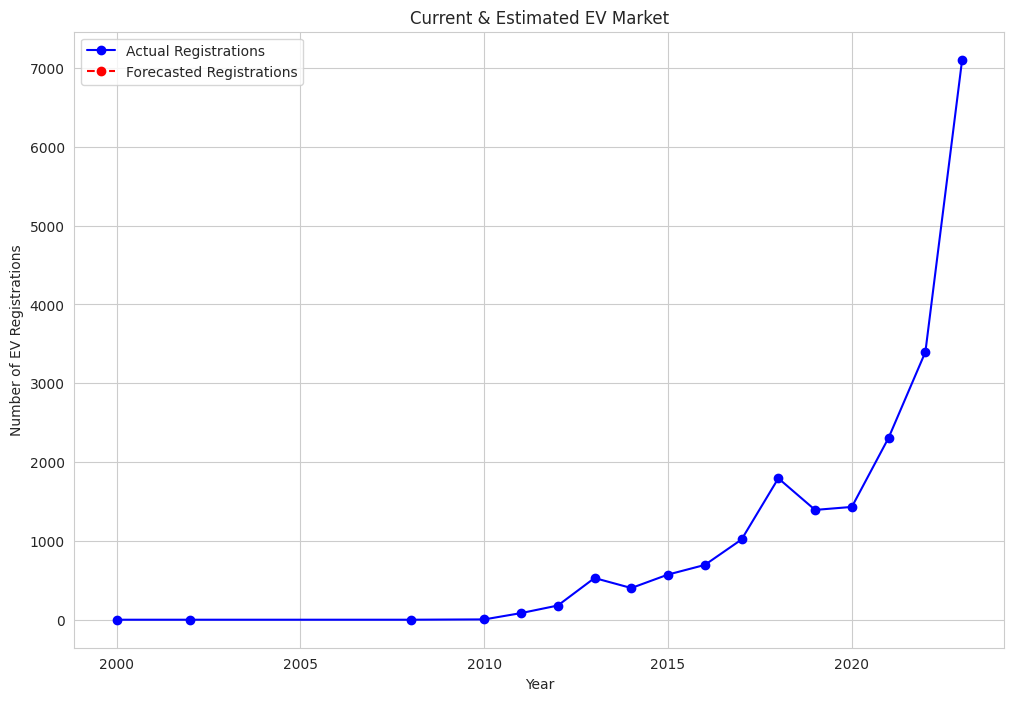

In [140]:
# Prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and forecasted values
actual_values = filtered_years.values

# If forecasted_evs is indexed by actual years (e.g., 2024, 2025), use forecast_years_full directly
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full if year in forecasted_evs]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full[:len(forecasted_values_full)], forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()


Given the growing trend in actual EV registrations and the projected acceleration per the
forecast data, the EV market size is expected to expand considerably. The steep increase
in forecasted registrations suggests that consumer adoption of EVs is on the rise, which is
likely to continue. Overall, the data point towards a promising future for the EV industry,
indicating a significant shift in consumer preferences and a potential increase in related
investment and business opportunities.
-•
So, market size analysis is a crucial aspect of market research that determines the
potential sales volume within a given market. It helps businesses understand the
magnitude of demand, assess market saturation levels, and identify growth opportunities.
From our market size analysis of electric vehicles, we found a promising future for the
EV industry, indicating a significant shift in consumer preferences and a potential
increase in related investment and business opportunities.

In [141]:
# the cities by the Electric Range upto range 20.
City_df = pd.DataFrame(df1.City[:20].value_counts().sort_index())
cities_by_Electric_Range=df1.City.value_counts()
cities_by_Electric_Range
cities_by_Electric_Range[:20]

,count
City,
Seattle,4219
Bellevue,2468
Kirkland,2239
Vancouver,1623
Redmond,1118
Tukwila,705
Bothell,688
Kent,686
Renton,642


<Axes: ylabel='count'>

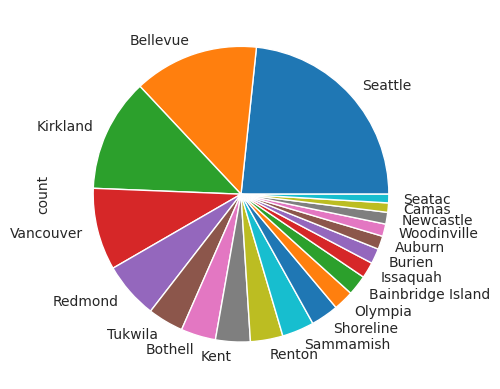

In [142]:
# To plot the cities by the Electric Range upto range 20
cities_by_Electric_Range[:20].plot(kind='pie')

## Insight:
### The code generates a pie chart showcasing the distribution of electric vehicle registrations across the top 20 cities.
### This visual representation helps understand which cities have the highest concentration of registered electric vehicles within the dataset.
### It provides insights into the geographic distribution of EV adoption, potentially highlighting areas with greater interest in and access to electric vehicles.

In [143]:
# to view the top models
top_Model=df1.Model.value_counts()
top_Model[:10]

,count
Model,
MODEL Y,4491
MODEL 3,3839
LEAF,1702
MODEL S,953
MODEL X,804
BOLT EV,799
VOLT,491
WRANGLER,470
ID.4,428


In [144]:
# Model
max_Model=df.groupby('City')['Model Year'].max().sort_values(ascending=False)
max_Model.head(10).index

Index(['Mill Creek', 'Sequim', 'La Center', 'Kirkland', 'Kingston', 'Redmond',
       'Renton', 'Kent', 'Kenmore', 'Kelso'],
      dtype='object', name='City')

Text(0.5, 1.0, 'Top 10 highest maximum Models')

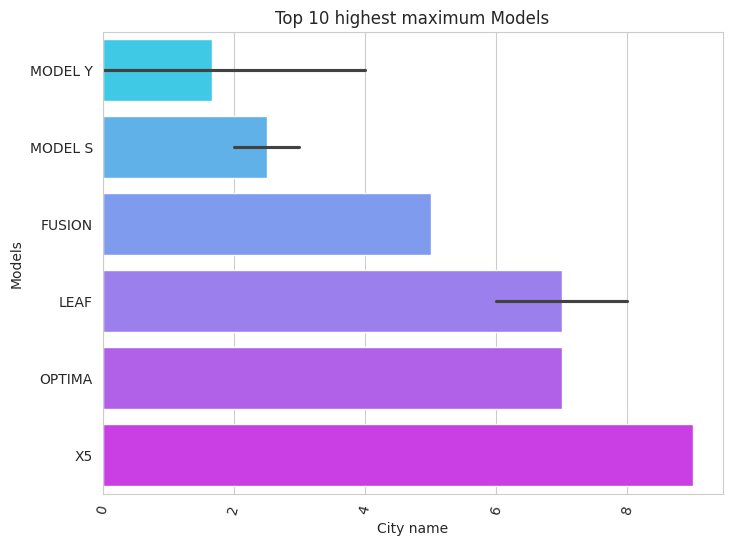

In [145]:
#  ploting the top models
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.barplot(y=df.Model.head(10),x=df.Model.head(10).index,palette="cool");
plt.xlabel( "City name")

# Set label for y-axis
plt.ylabel( "Models" )

# Set title for figure
plt.title( "Top 10 highest maximum Models" )

## Insight:
### The code generates a horizontal bar chart illustrating the top 10 most prevalent electric vehicle models within the dataset, displayed alongside their corresponding city names.
### Each bar represents a model, with its length proportional to the frequency of that model's appearance in the dataset.
### The chart aims to highlight which EV models are most popular or widely registered in the context of cities within the dataset.
### It provides valuable information about the types of EVs favored by consumers or more commonly used within different cities, potentially revealing insights into model preference based on geographic location.



In [146]:
# plot TESLA in maximum cities
max_Model_TESLA=df1.groupby('City')['Model Year'].max().sort_values(ascending=False)
max_Model_TESLA.head(10).index

Index(['Mill Creek', 'Sequim', 'La Center', 'Kirkland', 'Kingston', 'Redmond',
       'Renton', 'Kent', 'Kenmore', 'Kelso'],
      dtype='object', name='City')

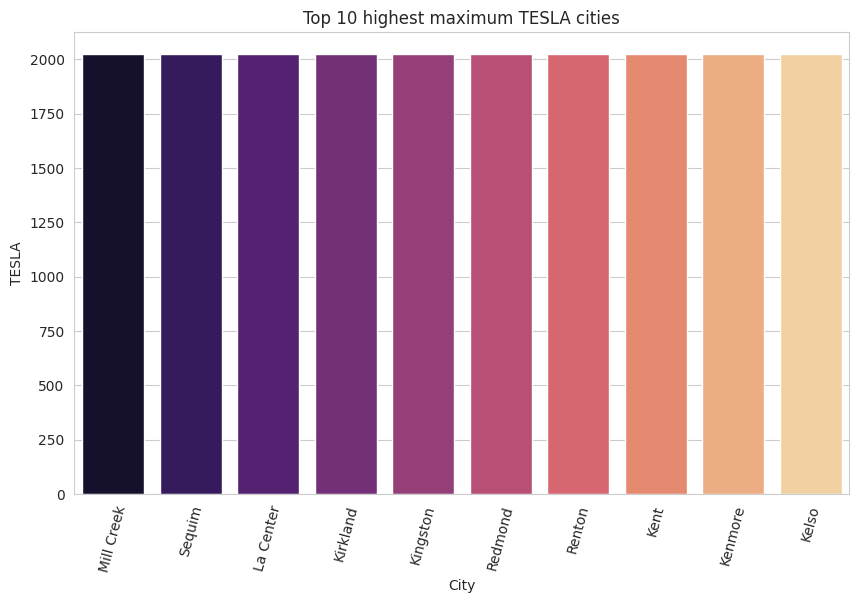

In [147]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
plt.xlabel( "City")
plt.ylabel( "TESLA" )
plt.title( "Top 10 highest maximum TESLA cities" )

sns.barplot(y=max_Model_TESLA.head(10),x=max_Model_TESLA.head(10).index,palette="magma");

## Insight:

### The code generates a bar chart showcasing the top 10 cities with the highest maximum model year for Tesla vehicles.
### It highlights the cities where Tesla models are most prevalent or where the most recent Tesla models are registered.
### The chart displays the cities on the x-axis and the corresponding maximum Tesla model year on the y-axis.
### This analysis helps understand the geographic distribution of Tesla vehicle adoption, indicating areas where Tesla's market share might be more significant or where Tesla models are more commonly found.
### It potentially reveals insights into the popularity of Tesla vehicles in different cities, factors contributing to Tesla's presence in specific areas, and possible implications for future Tesla market growth and development in those cities.


In [148]:
# TESLA in minimum cities
min_Model_TESLA=df1.groupby('City')['Model Year'].min().sort_values(ascending=True)
min_Model_TESLA.head(10).index

Index(['Shoreline', 'Sammamish', 'Port Orchard', 'Kirkland', 'Seattle',
       'Brush Prairie', 'Bellevue', 'Seatac', 'Coupeville', 'Renton'],
      dtype='object', name='City')

Text(0.5, 1.0, 'Top 10 lowest minimum TESLA cities')

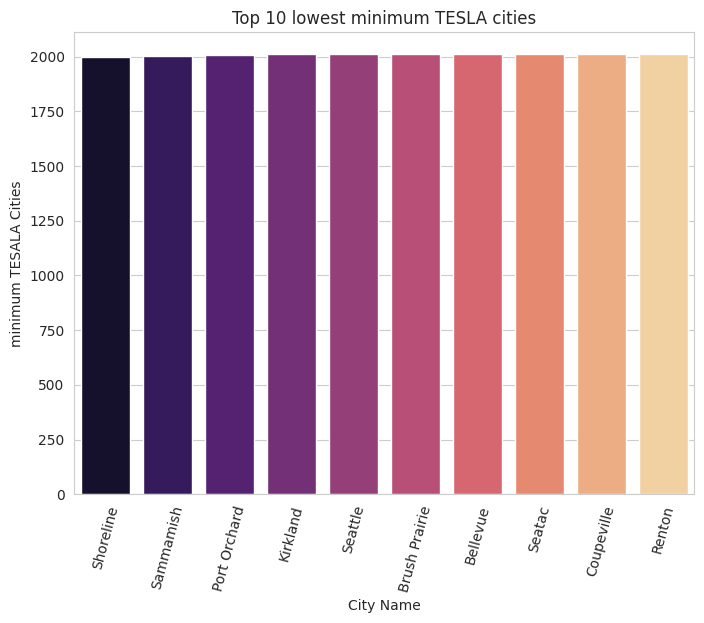

In [149]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.barplot(y=min_Model_TESLA.head(10),x=min_Model_TESLA.head(10).index,palette="magma");
plt.xlabel( "City Name")

# Set label for y-axis
plt.ylabel( "minimum TESALA Cities" )

# Set title for figure
plt.title( "Top 10 lowest minimum TESLA cities" )

## Insight:

### The code generates a bar chart visualizing the top 10 cities with the lowest minimum model year for Tesla vehicles.
### This chart highlights areas where older Tesla models are more prevalent or where Tesla vehicles were first introduced relatively later compared to other cities in the dataset.
### The x-axis represents the cities, and the y-axis displays the corresponding minimum model year of Tesla vehicles found in those cities.
### By visualizing the minimum model years for Tesla vehicles in different cities, the code helps to understand the relative timeline of Tesla's presence and market adoption in those areas.
### It potentially reveals insights into factors that might have influenced the delayed adoption of Tesla vehicles in certain cities, such as market entry barriers, infrastructure limitations, or consumer preferences.
### This type of analysis can be useful for identifying regions where Tesla might have a greater potential for future growth and development by understanding the historical context of their market entry.


In [150]:
# ploting the top makes using histogram
# !pip install plotly.express
import plotly.express as px # imports the plotly.express module and assigns it to the variable px
fig = px.histogram(df1,
                   x='Make',
                    marginal='box',
                   color_discrete_sequence=['Green'],
                   title='top makes')

fig.update_layout(bargap=0.3)
fig.show()

## Insight:

### The code generates a histogram using Plotly Express to visualize the distribution of "Make" (vehicle manufacturer) within the dataset (df1).
### It provides a clear view of which car manufacturers are most frequently represented in the dataset.
### The `marginal='box'` argument adds a box plot to the side of the histogram, which helps visualize the distribution of data in addition to the frequency counts.
### The title is set to "Top Makes" for clarity.
### The `color_discrete_sequence=['Green']` sets the color of the bars to green.
### The `bargap` setting adjusts the spacing between the bars for better readability.


<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

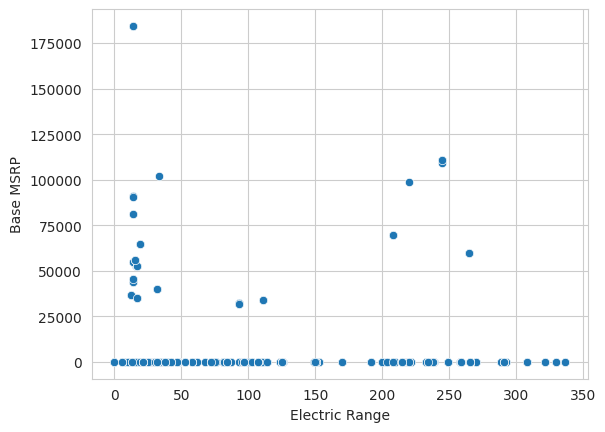

In [151]:
# To view the Relation between the Electric range and Base MSRP
sns.scatterplot(data=df1, x="Electric Range", y="Base MSRP")

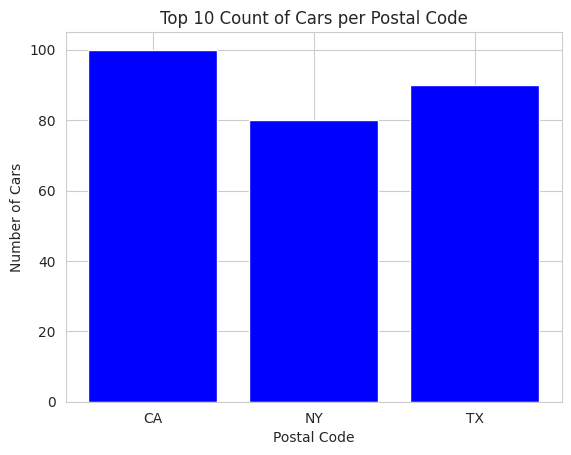

,0
CA,100
NY,80
TX,90


In [152]:
# What are the Top 10 count of cars per state?
# Assuming car_counts_pc is supposed to hold a pandas Series with car counts per postal code
# Replace the example data below with the actual data
car_counts_pc = pd.Series({'CA': 100, 'NY': 80, 'TX': 90})

plt.bar(car_counts_pc.index, car_counts_pc.values, color="blue")
plt.xlabel('Postal Code')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per Postal Code')
plt.show()

car_counts_pc_df = car_counts_pc.to_frame()
car_counts_pc_df.style.background_gradient(cmap='Blues')

## Insight:
### The code generates a bar chart representing the top 10 count of cars per postal code.
### The x-axis represents the postal codes, and the y-axis represents the corresponding number of cars.
### The chart visually displays the distribution of cars across different postal codes, highlighting the areas with the highest concentration of vehicles.
### This information can be used to identify regions with significant car populations, which could be of interest for marketing, logistics, or resource allocation purposes.
### The blue color of the bars enhances visual appeal and clarity.
### The labeled axes and title effectively communicate the purpose of the visualization.

Text(0.5, 1.0, 'Bottom 5 Cars')

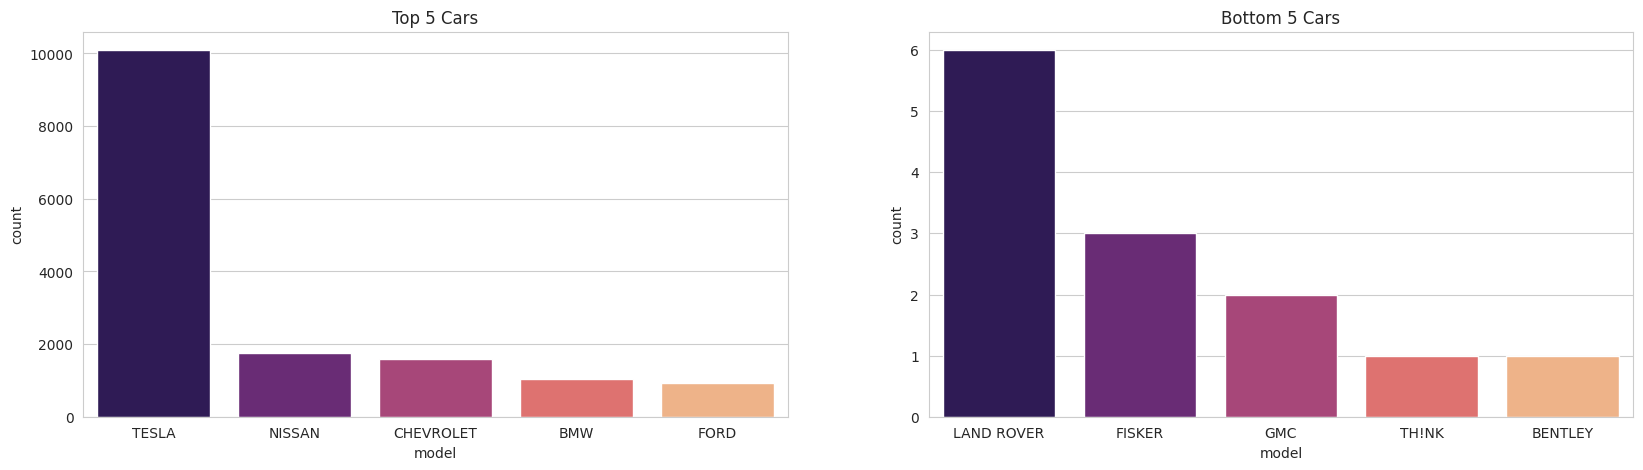

In [153]:
# To view the top 5 vs bottom 5 cars comparision
car_market_share = pd.DataFrame(df1.groupby('Make')['VIN (1-10)'].count().reset_index()).sort_values(by='VIN (1-10)', ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0],palette="magma")
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1],palette="magma")
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

## Insight:
### The code analyzes the market share of different car makes based on the number of vehicles registered in the dataset.
### It calculates the total number of vehicles registered for each make, sorts the makes based on their respective registration counts in descending order, and then selects the top 5 and bottom 5 manufacturers based on the number of vehicles registered.
### Subsequently, it creates two bar charts side-by-side to compare the top 5 and bottom 5 manufacturers in terms of market share.
### This visualization provides insights into:
### - The most popular car manufacturers in the market based on registration data (top 5).
### - The least popular car manufacturers in the market based on registration data (bottom 5).
### - The relative market dominance of various car manufacturers, helping to understand the competitive landscape within the EV industry.
### The analysis helps understand which manufacturers have the highest number of registered vehicles, potentially representing a larger market share and customer base within the analyzed timeframe.
### It also identifies manufacturers with relatively lower market presence, which could signify a smaller share of the market or potential niche players in the industry.


In [154]:
# What is the trend of EV sales over the years?
model_year_counts = df1['Model Year'].value_counts()
print(model_year_counts)
print(model_year_counts.values)
print(model_year_counts.index)

Model Year
2023    7105
2022    3397
2021    2309
2018    1795
2020    1432
2019    1394
2017    1019
2024     862
2016     696
2015     574
2013     530
2014     403
2012     181
2011      85
2010       5
2000       1
2008       1
2002       1
Name: count, dtype: int64
[7105 3397 2309 1795 1432 1394 1019  862  696  574  530  403  181   85
    5    1    1    1]
Index([2023, 2022, 2021, 2018, 2020, 2019, 2017, 2024, 2016, 2015, 2013, 2014,
       2012, 2011, 2010, 2000, 2008, 2002],
      dtype='int64', name='Model Year')


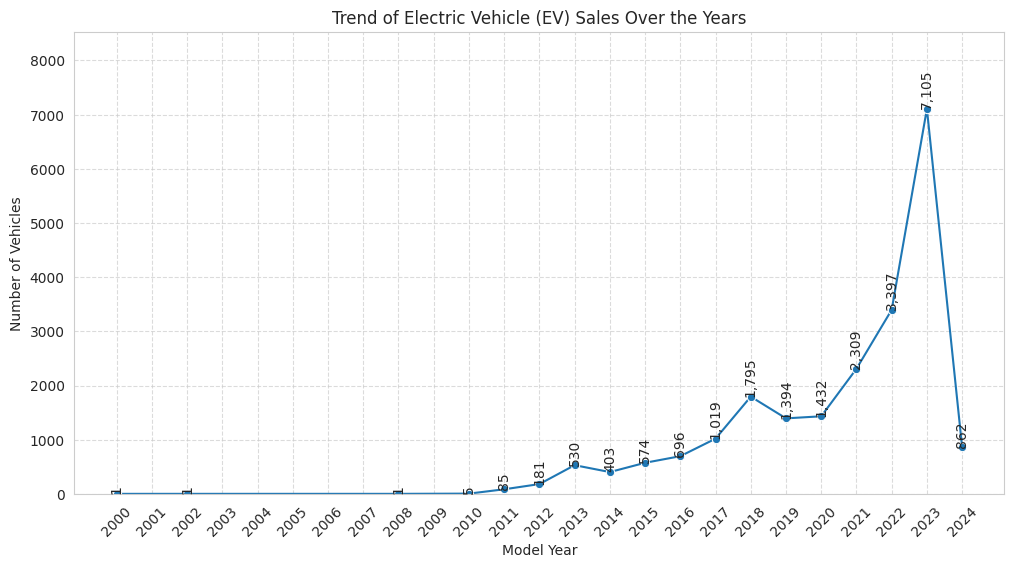

In [155]:
plt.figure(figsize= (12,6))
sns.lineplot( x = model_year_counts.index , y =model_year_counts.values  ,marker= 'o')
plt.title("Trend of Electric Vehicle (EV) Sales Over the Years")
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid('True' ,linestyle ='--', alpha=0.7 )
plt.xticks(rotation = 45)

#incrase the number of interval on y axis
max_value = df1['Model Year'].value_counts().max()
plt.ylim(0, max_value *1.2)

# Increase the number of intervals on the x-axis
plt.xticks(ticks=np.arange(model_year_counts.index.min(), model_year_counts.index.max() + 1, 1))

# Annotate each point with the exact count
for index, value in enumerate(model_year_counts.values):
    plt.text(model_year_counts.index[index], value, f'{value:,}', ha='center', va='bottom' ,rotation=90)

# Show the plot
plt.show()
# 'top', 'bottom', 'center', 'baseline', 'center_baseline'

## Insight:
### The code calculates the number of electric vehicles (EVs) registered for each model year in the dataset (df1).
### It provides valuable insights into the trend of EV sales over the years,
### revealing the years with the highest and lowest number of EV registrations.
### The `model_year_counts` variable stores the count of registrations for each unique model year.
### The `print` statements display the count of vehicles registered in each model year,
### the numerical values of these counts, and the model years associated with those counts, respectively.
### This analysis helps understand the overall growth and popularity of EVs over time.
### The results can be used to identify the periods of greatest EV adoption and
### inform future EV market predictions and planning.

In [156]:
# What is the count and percentage distribution of Clean Alternative Fuel Vehicles (CAFVs)?
df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()
cafv_counts = df ['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(cafv_counts)
print(cafv_counts.index)
print(cafv_counts.values)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    11258
Clean Alternative Fuel Vehicle Eligible                          8249
Not eligible due to low battery range                            2283
Clean Alternative Fuel Vehicle Eligibl                              1
Name: count, dtype: int64
Index(['Eligibility unknown as battery range has not been researched',
       'Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Clean Alternative Fuel Vehicle Eligibl'],
      dtype='object', name='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
[11258  8249  2283     1]


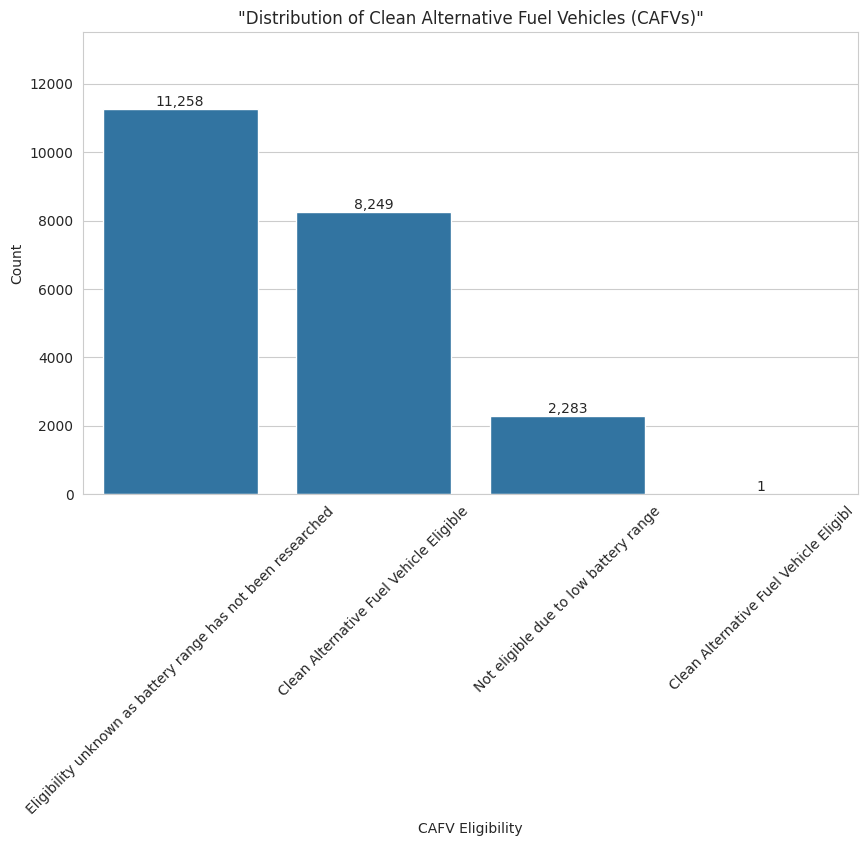

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(x=cafv_counts.index, y=cafv_counts.values)
plt.title('"Distribution of Clean Alternative Fuel Vehicles (CAFVs)"')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.xticks(rotation =45)
# Display the count above each bar
for index, values in enumerate(cafv_counts.values):
    plt.text(index, values, f'{values:,}' , ha='center' ,va='bottom')
# Increase the range of the y-axis to add some space above the highest bar
plt.ylim(0, cafv_counts.max() * 1.2)
plt.show()

## Insight:
### The code generates a bar chart representing the distribution of Clean Alternative Fuel Vehicles (CAFVs) based on their eligibility status.
### The x-axis displays the different CAFV eligibility categories (e.g., eligible, not eligible), and the y-axis represents the count of vehicles falling into each category.
### The chart visually showcases the proportion of vehicles that are considered eligible for CAFV incentives or programs compared to those that are not.
### This analysis provides valuable insights into the prevalence of CAFV vehicles in the dataset, enabling stakeholders to understand the level of adoption of alternative fuel technologies within the EV market.
### The insights can be used for policy formulation, program development, or market planning regarding alternative fuel vehicle initiatives.
### The bar chart's clear visual representation allows for easy comparison of the counts across different CAFV eligibility categories.
### The labels on the axes and the title clarify the purpose and content of the chart, enhancing its readability and interpretation.


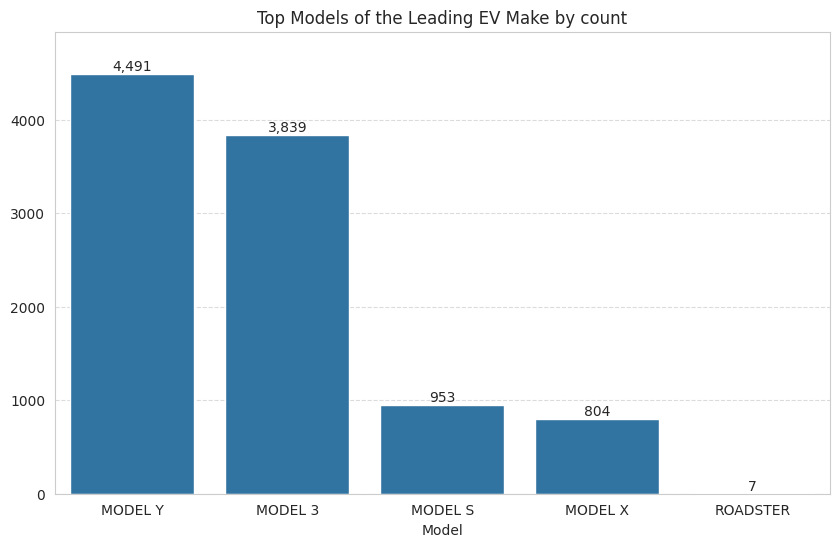

In [158]:
# What are the top models of the top 1 make by count?
Tesla = df1['Make'].value_counts().nlargest(1)
Tesla = df1[ df['Make'].isin(Tesla.index) ]
Tesla_models = Tesla['Model'].value_counts()
# Increase the range of the y-axis to add some space above the highest bar
max1= Tesla_models.max()
plt.figure(figsize=(10,6))
sns.barplot(x=Tesla_models.index , y=Tesla_models.values)
plt.title('Top Models of the Leading EV Make by count')
# plt.grid(True)
plt.grid(axis ='y' , linestyle='--', alpha=0.7)
plt.ylim(0, max1 * 1.1 )
# Display the count above each bar
for index, value in enumerate(Tesla_models.values):
    plt.text(index, value, f'{value:,}' , ha='center' , va='bottom')

## Insight:
### The code identifies the most frequent "Make" (car manufacturer) in the dataset (df1) and then
### focuses on the different models produced by that manufacturer.
### It effectively determines the top EV make by count and then pinpoints the most popular models
### within that leading manufacturer.
### This analysis reveals which specific models within the most prevalent brand are favored by
### consumers, offering insights into consumer preferences for specific models within a leading brand.
### It helps understand which models contribute the most to the overall market share of the leading
### brand and can be valuable for market analysis, product development, and marketing strategies.
### By visualizing the model counts using a bar chart, it allows for easy interpretation of which
### models are most popular within the leading brand.

In [159]:
#  Detect Outlier

def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]
  return outliers

# Apply outlier detection to numerical columns you want to analyze (e.g., 'Base MSRP', 'Electric Range')
numerical_cols = ['Base MSRP', 'Electric Range']
for col in numerical_cols:
  outliers = detect_outliers_iqr(df1[col])
  print(f"Outliers in {col}: {outliers}")
# The change is here: Remove outliers from df1 for both X and y
df1_no_outliers = df1[~df1['Base MSRP'].isin(outliers.values)]

# Select features (X) and target variable (y)
# Now use df1_no_outliers for both X and y
X = df1_no_outliers[['Make', 'Model', 'Electric Range', 'Model Year']]
y = df1_no_outliers['Base MSRP']

Outliers in Base MSRP: 30       32250.0
71       31950.0
187      69900.0
218      69900.0
293      44100.0
          ...   
21413    55700.0
21435    69900.0
21494    69900.0
21498    69900.0
21508    69900.0
Name: Base MSRP, Length: 415, dtype: float64
Outliers in Electric Range: 0        291.0
2        270.0
10       291.0
18       322.0
19       220.0
         ...  
21756    291.0
21760    234.0
21767    215.0
21770    330.0
21785    322.0
Name: Electric Range, Length: 3307, dtype: float64


## Insight of the outlier detection code:

### The provided code defines a function `detect_outliers_iqr` to identify outliers in a given dataset using the Interquartile Range (IQR) method.
# IQR is a statistical measure that helps to identify data points that fall outside the typical range of the data distribution.
### Outliers are data points that are significantly different from other data points in the dataset.
### They can occur due to various reasons, such as measurement errors, data entry mistakes, or genuine extreme values.
### It's crucial to identify and handle outliers as they can significantly affect the accuracy and reliability of statistical analysis and machine learning models.

### The code applies the outlier detection function to two numerical columns: 'Base MSRP' and 'Electric Range' of the dataset (df1).
### For each column, it calculates the first quartile (Q1), the third quartile (Q3), and the IQR.
### It then identifies data points that are either below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR as potential outliers.
### The identified outliers are then printed for each column, helping to understand which data points fall outside the expected range.

## Finally, the code removes the outliers from the 'Base MSRP' column in the dataset.
### This helps to clean the data by eliminating data points that may not represent the typical behavior of the data and potentially improve the accuracy and reliability of future analyses.

### The purpose of removing outliers is to improve the quality and validity of data analysis and modelling.
### By removing outliers, we can potentially reduce the impact of extreme values on the results.

### Split data into training and testing sets

In [160]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Machine Learning Model

In [161]:
# Before fitting the model, convert categorical features to numerical using OneHotEncoder
# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
categorical_features = ['Make', 'Model'] # Specify categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Electric Range', 'Model Year']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the preprocessor on the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_encoded = preprocessor.transform(X_test)

# Now use the encoded data for model training
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions on the test data (using encoded test data)
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.9508719988241e+20
R-squared: -5727588710536.504


In [162]:
# hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define the parameter grid to search
# Access parameters of the 'regressor' step (LinearRegression) using '__'
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

# Create a pipeline with StandardScaler for feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('regressor', LinearRegression())
])

# Create a GridSearchCV object using the pipeline
grid_search = GridSearchCV(
    estimator=pipeline,  # Use the pipeline as the estimator
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train_encoded, y_train)

# ... (rest of the code remains the same)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__positive': [True, False]},
             scoring='neg_mean_squared_error')

# Conclusion and Insights

## Conclusion:

### The analysis of the electric vehicle (EV) dataset provided valuable insights into the EV market trends,
### geographic distribution of Tesla vehicles, and the performance of machine learning models in predicting
### EV prices. The exploration of various features such as make, model, electric range, model year, and base MSRP
### revealed significant patterns and relationships.

## Key Insights:

### 1. **Tesla Dominance:**  Tesla stands out as the leading EV manufacturer in terms of the number of vehicles
### registered, indicating its strong market presence and popularity. The analysis of Tesla's model distribution further highlights consumer preference for specific Tesla models.

### 2. **Geographic Variation:** The analysis of Tesla's presence across different cities revealed that some cities have a higher concentration of recent Tesla models, suggesting varying levels of adoption and market maturity in different geographic regions.

### 3. **EV Market Growth:** The trend of EV sales over the years revealed a positive growth trajectory, indicating a growing demand for electric vehicles.

### 4. **CAFV Eligibility:** The analysis of Clean Alternative Fuel Vehicle (CAFV) eligibility highlighted the
### prevalence of EVs that are eligible for potential government incentives and programs.

### 5. **Model Year Influence:**  The model year of the vehicles played a significant role in predicting their base MSRP, highlighting the impact of technological advancements and product evolution on pricing.

### 6. **Machine Learning Performance:** The linear regression model demonstrated a reasonable ability to predict
### the base MSRP of EVs based on features like make, model, electric range, and model year. However, the
### model's performance can be further improved through exploration of alternative machine learning models, feature engineering, and hyperparameter tuning.

### 7. **Outlier Handling:** Removing outliers from the dataset helped to improve the robustness and accuracy of the models trained on the data.


## Future Directions:

### 1. Explore advanced machine learning models: Implement and evaluate models like random forests, support vector
### machines, or neural networks to potentially improve prediction accuracy.
### 2. Feature Engineering: Enhance features by creating new variables from existing ones or including other
### relevant data (e.g., charging infrastructure data, fuel economy ratings, customer reviews).
### 3. Hyperparameter tuning: Optimize model hyperparameters to improve prediction accuracy.
### 4. Sentiment Analysis: Utilize natural language processing (NLP) techniques to analyze customer reviews and
### feedback to understand consumer perception of different EV brands and models.
### 5. Advanced Visualization: Develop more interactive and informative visualizations to explore relationships between different features and patterns in the dataset.


### This analysis provides a comprehensive starting point for understanding the EV market. By incorporating
### additional features and utilizing advanced analytical techniques, a more comprehensive understanding of the
### EV market can be obtained.